# **Module 7 Task 2 - Chapter 15 Practice**
## **Author: Wade Bryson**
## **GitHub: https://github.com/WadeBryson**

### 15.2.2 Loading the Dataset

In [1]:
from sklearn.datasets import load_digits
digits = load_digits()

#### Displaying the target values of every 100th sample

In [2]:
digits.target[::100]

array([0, 4, 1, 7, 4, 8, 2, 2, 4, 4, 1, 9, 7, 3, 2, 1, 2, 5])

#### Confirming number of samples and features

In [3]:
digits.data.shape

(1797, 64)

#### Flattening a two-dimensional array into a one-dimensional array

In [4]:
digits.data[13]

array([ 0.,  2.,  9., 15., 14.,  9.,  3.,  0.,  0.,  4., 13.,  8.,  9.,
       16.,  8.,  0.,  0.,  0.,  0.,  6., 14., 15.,  3.,  0.,  0.,  0.,
        0., 11., 14.,  2.,  0.,  0.,  0.,  0.,  0.,  2., 15., 11.,  0.,
        0.,  0.,  0.,  0.,  0.,  2., 15.,  4.,  0.,  0.,  1.,  5.,  6.,
       13., 16.,  6.,  0.,  0.,  2., 12., 12., 13., 11.,  0.,  0.])

#### Displaying the 8x8 image daat and numeric value of the digit the image represents

In [5]:
digits.images[22]

array([[ 0.,  0.,  8., 16.,  5.,  0.,  0.,  0.],
       [ 0.,  1., 13., 11., 16.,  0.,  0.,  0.],
       [ 0.,  0., 10.,  0., 13.,  3.,  0.,  0.],
       [ 0.,  0.,  3.,  1., 16.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  9., 12.,  0.,  0.,  0.],
       [ 0.,  0.,  3., 15.,  5.,  0.,  0.,  0.],
       [ 0.,  0., 14., 15.,  8.,  8.,  3.,  0.],
       [ 0.,  0.,  7., 12., 12., 12., 13.,  1.]])

### 15.2.3 Visualizing the Data

#### Creating the Diagram

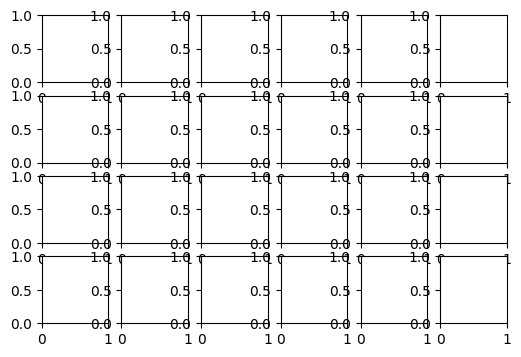

In [6]:
import matplotlib.pyplot as plt
figure, axes = plt.subplots(nrows=4, ncols=6, figsize=(6, 4))

#### Displaying Each Image and Removing the Axes Labels

In [10]:
# This code kept giving me an error that it was too much to unpack
# for item in zip(axes.ravel(), digits.images, digits.target):
  #  axes.image, target = item
  #  axes.imshow(image, cmap=plt.cm.gray_r)
  #  axes.set_xticks([])
  #  axes.set._yticks([])
  #  axes.set_title(target)
# plt.tight_layout()

#### Self-Check Display the image for sample number 22 of the Digits Dataset

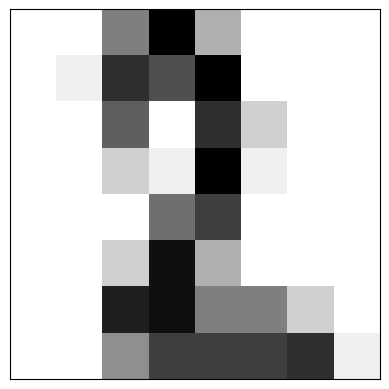

In [11]:
axes = plt.subplot()
image = plt.imshow(digits.images[22], cmap=plt.cm.gray_r)
xticks = axes.set_xticks([])
yticks = axes.set_yticks([])

### 15.2.4 Splitting the Data for Training and Testing

#### Break the data into a training set and testing set

In [12]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
    digits.data, digits.target, random_state=11
)

#### Showing 75% of the data is for training and 25% in testing

In [15]:
x_train.shape

(1347, 64)

In [16]:
x_test.shape

(450, 64)

### 15.2.5 Creating the Model

In [17]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

### 15.2.6 Training the Model

In [20]:
knn.fit(x_train, y_train)

KNeighborsClassifier()

### 15.2.7 Predicting Digit Classes

In [22]:
predicted = knn.predict(x_test)
expected = y_test

#### Predicted Digits vs Expected Digits (20 samples)

In [23]:
predicted[:20]

array([0, 4, 9, 9, 3, 1, 4, 1, 5, 0, 4, 9, 4, 1, 5, 3, 3, 8, 5, 6])

In [24]:
expected[:20]

array([0, 4, 9, 9, 3, 1, 4, 1, 5, 0, 4, 9, 4, 1, 5, 3, 3, 8, 3, 6])

#### Locating all incorrect predictions for entire test set

In [25]:
wrong = [(p, e) for (p, e) in zip(predicted, expected) if p != e]
wrong

[(5, 3),
 (8, 9),
 (4, 9),
 (7, 3),
 (7, 4),
 (2, 8),
 (9, 8),
 (3, 8),
 (3, 8),
 (1, 8)]

### 15.3.1 Metrics for Model Accuracy

#### Estimator Method Score

In [26]:
print(f'{knn.score(x_test, y_test):.2%}')

97.78%


#### Calling the confusion Matrix

In [28]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_true=expected, y_pred=predicted)
confusion

array([[45,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 45,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 54,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 42,  0,  1,  0,  1,  0,  0],
       [ 0,  0,  0,  0, 49,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0, 38,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 42,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 45,  0,  0],
       [ 0,  1,  1,  2,  0,  0,  0,  0, 39,  1],
       [ 0,  0,  0,  0,  1,  0,  0,  0,  1, 41]], dtype=int64)

#### Classification Report

In [29]:
from sklearn.metrics import classification_report
names = [str(digit) for digit in digits.target_names]
print(classification_report(expected, predicted, target_names=names))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        45
           1       0.98      1.00      0.99        45
           2       0.98      1.00      0.99        54
           3       0.95      0.95      0.95        44
           4       0.98      0.98      0.98        50
           5       0.97      1.00      0.99        38
           6       1.00      1.00      1.00        42
           7       0.96      1.00      0.98        45
           8       0.97      0.89      0.93        44
           9       0.98      0.95      0.96        43

    accuracy                           0.98       450
   macro avg       0.98      0.98      0.98       450
weighted avg       0.98      0.98      0.98       450



#### Creating a Visual for the Confusion Matrix

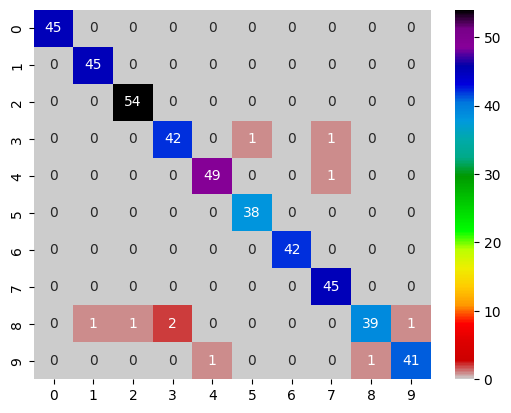

In [30]:
import pandas as pd
confusion_df = pd.DataFrame(confusion, index=range(10), columns=range(10))

import seaborn as sns
axes = sns.heatmap(confusion_df, annot=True, cmap='nipy_spectral_r')

### 15.3.2 K-Fold Cross Validation

#### K-Fold Class

In [31]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=10, random_state=11, shuffle=True)

#### Using KFold Object and cross_val_score to train and test model

In [34]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(estimator=knn, X=digits.data, y=digits.target, cv=kfold)

scores

array([0.97777778, 0.99444444, 0.98888889, 0.97777778, 0.98888889,
       0.99444444, 0.97777778, 0.98882682, 1.        , 0.98324022])

#### Finding the Mean and Standard Deviation of Accuracy Scores

In [35]:
print(f'Mean accuracy: {scores.mean():.2%}')

Mean accuracy: 98.72%


In [36]:
print(f'Accuracy standard deviation: {scores.std():.2%}')

Accuracy standard deviation: 0.75%


### 15.3.3 Running Multiple Models to Find the Best One

In [37]:
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

### Creating Estimators

In [38]:
estimators = {
    'KNeighborsClassifier': knn,
    'SVC': SVC(gamma='scale'),
    'GaussianNB': GaussianNB()
}

In [39]:
for estimator_name, estimator_object in estimators.items():
    kfold = KFold(n_splits=10, random_state=11, shuffle=True)
    scores = cross_val_score(estimator=estimator_object,
                             X=digits.data, y=digits.target, cv=kfold)
    print(f'mean accuracy={scores.mean():.2%};' +
          f'standard deviation={scores.std():.2f}')

mean accuracy=98.72%;standard deviation=0.01
mean accuracy=98.72%;standard deviation=0.01
mean accuracy=84.48%;standard deviation=0.03


### 15.3.4 Hyperparameter Tuning

In [40]:
for k in range (1, 20, 2):
    kfold = KFold(n_splits=10, random_state=11, shuffle=True)
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(estimator=knn,
                             X=digits.data, y=digits.target, cv=kfold)
    print(f'k={k:<2}: mean accuracy={scores.mean():.2%}; ' + 
          f'standard deviation={scores.std():.2%}')

k=1 : mean accuracy=98.83%; standard deviation=0.58%
k=3 : mean accuracy=98.83%; standard deviation=0.72%
k=5 : mean accuracy=98.72%; standard deviation=0.75%
k=7 : mean accuracy=98.44%; standard deviation=0.96%
k=9 : mean accuracy=98.39%; standard deviation=0.80%
k=11: mean accuracy=98.33%; standard deviation=0.90%
k=13: mean accuracy=97.89%; standard deviation=0.89%
k=15: mean accuracy=97.89%; standard deviation=1.02%
k=17: mean accuracy=97.50%; standard deviation=1.00%
k=19: mean accuracy=97.66%; standard deviation=0.96%


### 15.4 Case Study: Time Series and Simple Linear Regression

#### Loading Average High Temperatures

In [ ]:
import pandas as pd
nyc = pd.read_csv('ave_hi_nyc_')